<a href="https://colab.research.google.com/github/Madhu2s6361/Cardiovascular-Disease-Prediction/blob/main/Project_1_Cardiovascular_Disease_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Project 1 : Cardiovascular Disease Prediction


**Cardiovascular Disease:
Definition: It is the application of machine learning (ML) algorithms to analyze patient health data (such as age, cholesterol, blood pressure, glucose levels, lifestyle habits, etc.) to predict the risk or presence of cardiovascular diseases (CVDs) like heart attack, stroke, or heart failure.

Why it’s important

Cardiovascular diseases are the leading cause of death worldwide.

Early detection can save lives by enabling timely intervention.

Traditional methods rely on manual interpretation (ECG, blood tests, clinical judgment), while ML can process large, complex datasets and find hidden patterns that humans may miss.

Cardiovascular Diseases: https://bigapollospectra.com/news/cardiovascular-disease-types-causes-and-symptoms

****Concept

Input (Features): age, gender, cholesterol, blood pressure, smoking, BMI, glucose, etc.

Target (Label): cardio (1 = has cardiovascular disease; 0 = no disease).

****Approach:

Perform EDA → clean + explore dataset.

Train/Test split.

Scale features.

Apply ML model (Logistic Regression, RandomForest, etc.).

Evaluate (Accuracy, Confusion Matrix, ROC, Precision, F1 score, classification report etc...)


• Perform data pre-processing operations.
• As a part of data analysis and visualizations draw all the possible plots to provide essential informations and to derive some meaningful insights.

• Show your correlation matrix of features according to the datasets.

• Find out accuracy levels of various machine learning techniques such as
Support Vector Machines (SVM), K-Nearest Neighbor (KNN),
Decision Trees (DT) ,
Logistic Regression (LR) and
Random Forest (RF).

• Build your Machine learning model for heart disease detection according to the result.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df= pd.read_csv("cardio.csv")

In [3]:
df

,id;age;gender;height;weight;ap_hi;ap_lo;cholesterol;gluc;smoke;alco;active;cardio
0,0;18393;2;168;62.0;110;80;1;1;0;0;1;0
1,1;20228;1;156;85.0;140;90;3;1;0;0;1;1
2,2;18857;1;165;64.0;130;70;3;1;0;0;0;1
3,3;17623;2;169;82.0;150;100;1;1;0;0;1;1
4,4;17474;1;156;56.0;100;60;1;1;0;0;0;0
...,...
25067,35798;19103;1;159;59.0;120;80;1;1;0;0;1;1
25068,35799;16850;2;175;86.0;140;80;2;1;1;0;1;1
25069,35800;19578;1;162;68.0;110;60;3;1;0;0;1;1
25070,35801;14716;2;162;64.0;120;70;1;1;0;0;1;0


In [4]:
df= pd.read_csv("cardio.csv",sep=";") # The separator (delimiter) between columns in the CSV file is a semicolon (;), not a comma (,).

In [5]:
df.head() # View the first 5 rowsof the DataFrame.

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1.0,1.0,0.0,0.0,1.0,0.0
1,1,20228,1,156,85.0,140,90,3.0,1.0,0.0,0.0,1.0,1.0
2,2,18857,1,165,64.0,130,70,3.0,1.0,0.0,0.0,0.0,1.0
3,3,17623,2,169,82.0,150,100,1.0,1.0,0.0,0.0,1.0,1.0
4,4,17474,1,156,56.0,100,60,1.0,1.0,0.0,0.0,0.0,0.0


In [6]:
df.tail() # View the last 5 rowsof the DataFrame.

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
25067,35798,19103,1,159,59.0,120,80,1.0,1.0,0.0,0.0,1.0,1.0
25068,35799,16850,2,175,86.0,140,80,2.0,1.0,1.0,0.0,1.0,1.0
25069,35800,19578,1,162,68.0,110,60,3.0,1.0,0.0,0.0,1.0,1.0
25070,35801,14716,2,162,64.0,120,70,1.0,1.0,0.0,0.0,1.0,0.0
25071,35802,16000,1,176,116.0,110,7,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
df.sample() # View the random 5rows of the DataFrame.

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
24774,35379,20875,1,159,95.0,200,100,1.0,1.0,0.0,0.0,0.0,0.0


In [8]:
df.shape # Get the dimensions ofthe DataFrame.

(25072, 13)

In [9]:
df.dtypes # Check data types ofcolumns.

,0
id,int64
age,int64
gender,int64
height,int64
weight,float64
ap_hi,int64
ap_lo,int64
cholesterol,float64
gluc,float64
smoke,float64


In [10]:
df.index # Display the indexrange.

RangeIndex(start=0, stop=25072, step=1)

In [11]:
df.info() # Get a concise summaryof the DataFrame.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25072 entries, 0 to 25071
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           25072 non-null  int64  
 1   age          25072 non-null  int64  
 2   gender       25072 non-null  int64  
 3   height       25072 non-null  int64  
 4   weight       25072 non-null  float64
 5   ap_hi        25072 non-null  int64  
 6   ap_lo        25072 non-null  int64  
 7   cholesterol  25071 non-null  float64
 8   gluc         25071 non-null  float64
 9   smoke        25071 non-null  float64
 10  alco         25071 non-null  float64
 11  active       25071 non-null  float64
 12  cardio       25071 non-null  float64
dtypes: float64(7), int64(6)
memory usage: 2.5 MB


In [12]:
df.describe() # Summarystatistics for numericalcolumns.

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,25072.000000,25072.000000,25072.000000,25072.000000,25072.000000,25072.000000,25072.000000,25071.000000,25071.000000,25071.000000,25071.000000,25071.000000,25071.000000
mean,17892.715260,19457.369775,1.350830,164.399330,74.173455,127.334357,97.624601,1.363169,1.224881,0.091181,0.054764,0.804555,0.496390
std,10352.852917,2473.629583,0.477239,8.205966,14.352088,75.955404,211.248336,0.677531,0.570660,0.287872,0.227524,0.396551,0.499997
min,0.000000,10798.000000,1.000000,55.000000,30.000000,-140.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,8921.750000,17641.750000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,17900.500000,19696.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,26849.500000,21316.000000,2.000000,170.000000,82.000000,140.000000,90.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,35802.000000,23690.000000,2.000000,250.000000,200.000000,11500.000000,10000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [13]:
df.columns # List column names.

Index(['id', 'age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo',
       'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio'],
      dtype='object')

In [14]:
# Cleaning Data

df.isnull() # Check for nullvalues.

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25067,False,False,False,False,False,False,False,False,False,False,False,False,False
25068,False,False,False,False,False,False,False,False,False,False,False,False,False
25069,False,False,False,False,False,False,False,False,False,False,False,False,False
25070,False,False,False,False,False,False,False,False,False,False,False,False,False


In [15]:
df.notnull() # Check for non-nullvalues.

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,True,True,True,True,True,True,True,True,True,True,True,True,True
1,True,True,True,True,True,True,True,True,True,True,True,True,True
2,True,True,True,True,True,True,True,True,True,True,True,True,True
3,True,True,True,True,True,True,True,True,True,True,True,True,True
4,True,True,True,True,True,True,True,True,True,True,True,True,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
25067,True,True,True,True,True,True,True,True,True,True,True,True,True
25068,True,True,True,True,True,True,True,True,True,True,True,True,True
25069,True,True,True,True,True,True,True,True,True,True,True,True,True
25070,True,True,True,True,True,True,True,True,True,True,True,True,True


In [16]:
df["age"]= (df["age"]/365).astype(int)
df["age"]

,age
0,50
1,55
2,51
3,48
4,47
...,...
25067,52
25068,46
25069,53
25070,40


In [17]:
df["bmi"]= df["weight"]/ ((df["height"]/100 ** 2))
df["bmi"]

,bmi
0,3690.476190
1,5448.717949
2,3878.787879
3,4852.071006
4,3589.743590
...,...
25067,3710.691824
25068,4914.285714
25069,4197.530864
25070,3950.617284


In [18]:
# Remove abnormal values (data cleaning)
# ap_hi: systolic_bp
# ap_lo: diastolic_bp
df = df[(df["ap_hi"] >= df["ap_lo"]) & (df["ap_hi"] <= 250) & (df["ap_lo"] >= 40)]

In [19]:
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,bmi
0,0,50,2,168,62.0,110,80,1.0,1.0,0.0,0.0,1.0,0.0,3690.476190
1,1,55,1,156,85.0,140,90,3.0,1.0,0.0,0.0,1.0,1.0,5448.717949
2,2,51,1,165,64.0,130,70,3.0,1.0,0.0,0.0,0.0,1.0,3878.787879
3,3,48,2,169,82.0,150,100,1.0,1.0,0.0,0.0,1.0,1.0,4852.071006
4,4,47,1,156,56.0,100,60,1.0,1.0,0.0,0.0,0.0,0.0,3589.743590
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25066,35797,49,2,156,59.0,120,80,1.0,1.0,1.0,0.0,1.0,0.0,3782.051282
25067,35798,52,1,159,59.0,120,80,1.0,1.0,0.0,0.0,1.0,1.0,3710.691824
25068,35799,46,2,175,86.0,140,80,2.0,1.0,1.0,0.0,1.0,1.0,4914.285714
25069,35800,53,1,162,68.0,110,60,3.0,1.0,0.0,0.0,1.0,1.0,4197.530864


In [20]:
# Step 1: Remove missing values
df = df.dropna(subset=['cardio'])

In [21]:
# Step 2: Keep only valid entries (0 or 1)
df = df[df['cardio'].isin([0, 1, 0.0, 1.0])]

In [22]:
# Step 3: Convert to integer type
df['cardio'] = df['cardio'].astype(int)

In [23]:
df['cardio']

,cardio
0,0
1,1
2,1
3,1
4,0
...,...
25066,0
25067,1
25068,1
25069,1


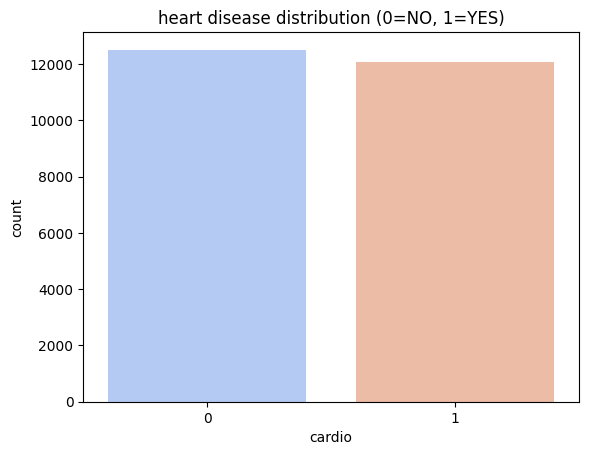

In [24]:
# Distribution of target variable
sns.countplot(x="cardio", data=df, palette="coolwarm")
plt.title("heart disease distribution (0=NO, 1=YES)")
plt.show()

In [25]:
gender_cardio= df.groupby("gender")["cardio"].mean().reset_index()
gender_cardio

,gender,cardio
0,1,0.490299
1,2,0.492917


In [26]:
display(gender_cardio['cardio'])

,cardio
0,0.490299
1,0.492917


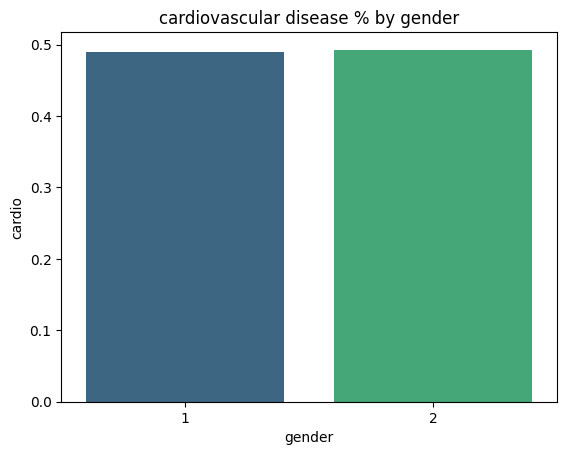

In [27]:
sns.barplot(x="gender", y="cardio", data=gender_cardio, palette="viridis")
plt.title("cardiovascular disease % by gender")
plt.show()

In [28]:
age_chol= df.groupby("age")["cholesterol"].mean().reset_index()

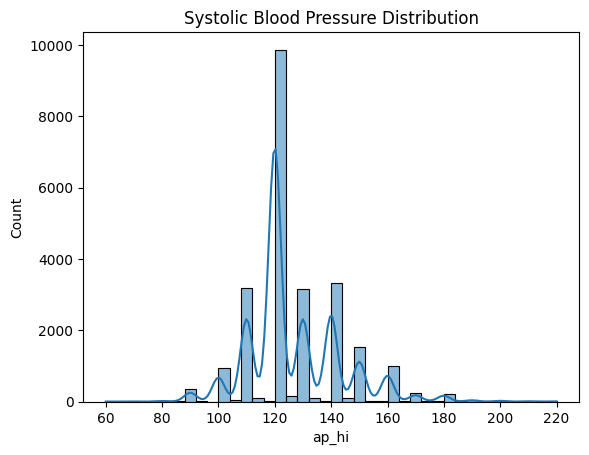

In [29]:
# Systolic Blood Pressure distribution [ap_hi: systolic_bp]
sns.histplot(df['ap_hi'], kde=True, bins=40)
plt.title('Systolic Blood Pressure Distribution')
plt.show()

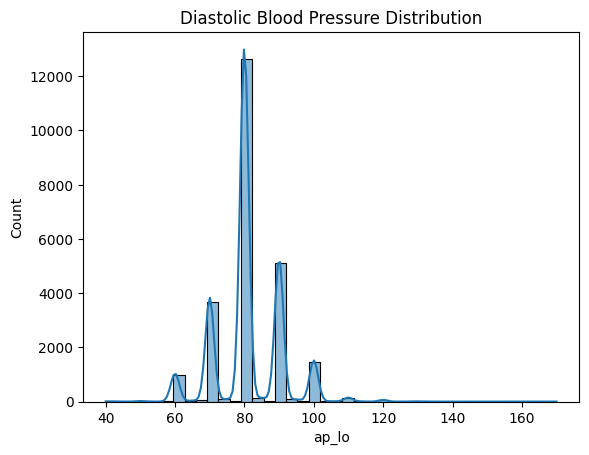

In [30]:
# Diastolic Blood Pressure distribution [ap_lo: diastolic_bp]
sns.histplot(df['ap_lo'], kde=True, bins=40)
plt.title('Diastolic Blood Pressure Distribution')
plt.show()

In [31]:
prob = 0.496727  # example probability
if prob >= 0.5:
    print(f"Risk Detected! ({prob*100:.2f}% chance of heart disease)")
else:
    print(f"No significant risk. ({prob*100:.2f}% chance of heart disease)")

No significant risk. (49.67% chance of heart disease)


In [32]:
# Average cholesterol by gender
# Average cholesterol by age
df.groupby('gender')['cholesterol'].mean()

,cholesterol
gender,
1,1.381274
2,1.322805


In [33]:
df.groupby('age')['cholesterol'].mean()

,cholesterol
age,
29,1.000000
39,1.176730
40,1.151246
41,1.197802
42,1.170385
43,1.270053
44,1.196154
45,1.238786
46,1.215517


In [34]:
# Count of patients by cardio status 0=NO, 1=Yes
df.groupby('cardio').size()

,0
cardio,
0,12511
1,12079


In [35]:
df.groupby('cardio')[['ap_hi', 'ap_lo']].mean()


,ap_hi,ap_lo
cardio,,
0,119.618336,78.100791
1,133.867290,84.548969


In [36]:
df.groupby(['gender', 'cardio'])['cholesterol'].mean()


gender  cardio
1       0         1.224214
        1         1.544549
2       0         1.186398
        1         1.463133
Name: cholesterol, dtype: float64

In [37]:
df.groupby('cardio')['age'].agg(['mean', 'min', 'max'])


,mean,min,max
cardio,,,
0,51.219087,29,64
1,54.418412,39,64


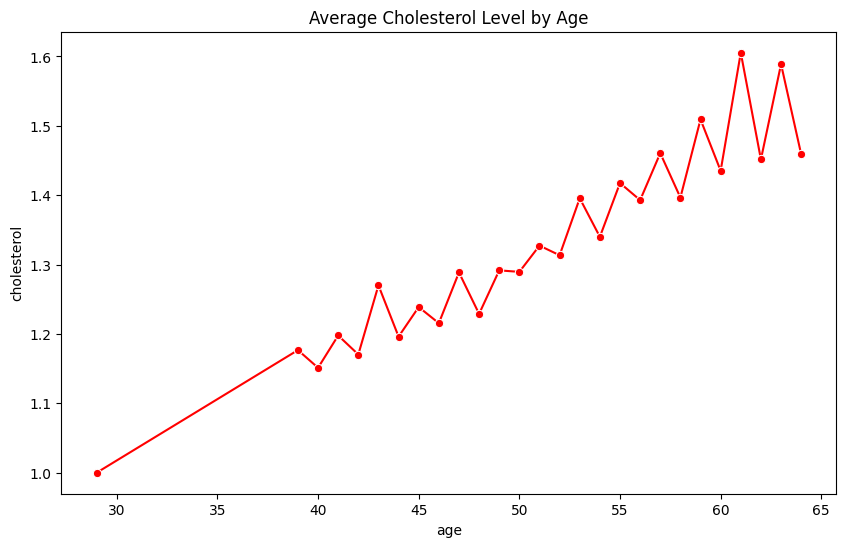

In [38]:
age_chol = df.groupby('age')['cholesterol'].mean().reset_index()

plt.figure(figsize=(10,6))
sns.lineplot(data=age_chol, x='age', y='cholesterol', marker='o', color='red')
plt.title('Average Cholesterol Level by Age')
plt.show()


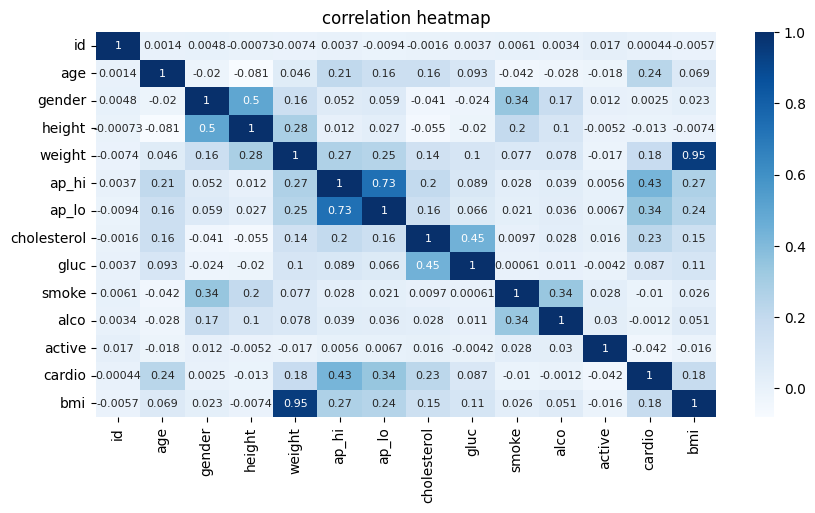

In [39]:
# Correlation matrix
plt.figure(figsize=(10,5))
sns.heatmap(df.corr(), annot=True, cmap="Blues", annot_kws={"size": 8})
plt.title("correlation heatmap")
plt.show()

#Train Models and Compare Accuracy
---> the train and evaluate

***five ML algorithms:


1. SVM
2. KNN
3. Decision Tree
4. Logistic Regression
5. Random Forest



#Train-test split and StandardScaler

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [41]:
# Feature Selection and Train-Test Split
x = df.drop(columns=["cardio","patientid"], errors='ignore')
y = df['cardio']

In [42]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [43]:
# Feature scaling
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

 the dataset is divided into input features (X) and output labels (y).

Split data → 80% training, 20% testing.

Used StandardScaler to normalize values (important for ML models like SVM, KNN).

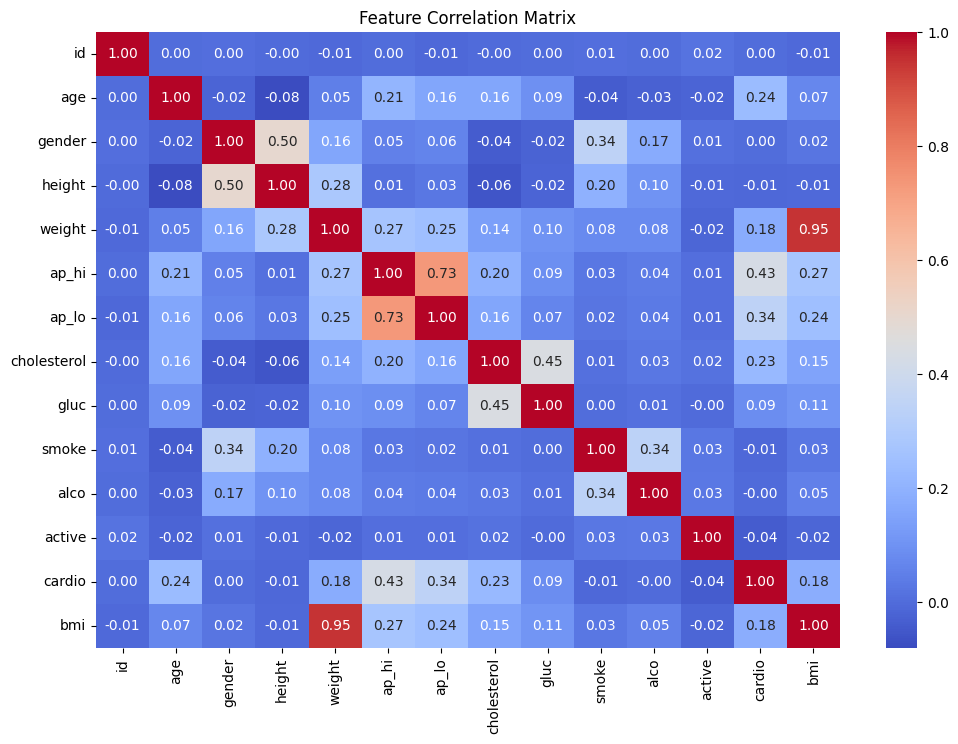

In [44]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Feature Correlation Matrix')
plt.show()

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

#Logistic Regression (LR):

Concept:
A statistical model that predicts binary outcomes (like Disease / No Disease) by finding a linear relationship between features and the log-odds of the target.

In [46]:
# Logistic Regression
lr = LogisticRegression()
lr.fit(x_train, y_train)
y_pred_lr = lr.predict(x_test)

In [47]:
acc_lr = accuracy_score(y_test, y_pred_lr)
print(f"🔹 Logistic Regression Accuracy: {acc_lr:.4f}")
print(classification_report(y_test, y_pred_lr))

🔹 Logistic Regression Accuracy: 0.7349
              precision    recall  f1-score   support

           0       0.72      0.79      0.75      2531
           1       0.75      0.68      0.71      2387

    accuracy                           0.73      4918
   macro avg       0.74      0.73      0.73      4918
weighted avg       0.74      0.73      0.73      4918



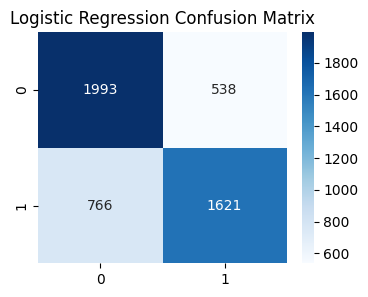

In [48]:
# Confusion Matrix
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, cmap="Blues", fmt='d')
plt.title("Logistic Regression Confusion Matrix")
plt.show()

#K-Nearest Neighbors (KNN):

Concept:
KNN predicts a sample’s class by looking at the majority class among its k nearest neighbors in the feature space.

In [49]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_test)

In [50]:
acc_knn = accuracy_score(y_test, y_pred_knn)
print(f"🔹 KNN Accuracy: {acc_knn:.4f}")
print(classification_report(y_test, y_pred_knn))

🔹 KNN Accuracy: 0.6858
              precision    recall  f1-score   support

           0       0.69      0.70      0.70      2531
           1       0.68      0.67      0.67      2387

    accuracy                           0.69      4918
   macro avg       0.69      0.69      0.69      4918
weighted avg       0.69      0.69      0.69      4918



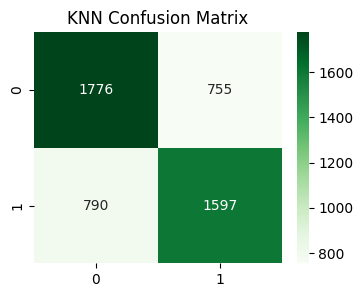

In [51]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, y_pred_knn), annot=True, cmap="Greens", fmt='d')
plt.title("KNN Confusion Matrix")
plt.show()

#Support Vector Machine (SVM):

Concept:
SVM tries to find the optimal hyperplane that separates the classes (Disease / No Disease) with maximum margin.

In [52]:
# SVM
svm = SVC(kernel="rbf", probability=True)
svm.fit(x_train, y_train)
y_pred_svm = svm.predict(x_test)

In [53]:
acc_svm = accuracy_score(y_test, y_pred_svm)
print(f"SVM Accuracy: {acc_svm:.4f}")
print(classification_report(y_test, y_pred_svm))

SVM Accuracy: 0.7462
              precision    recall  f1-score   support

           0       0.73      0.80      0.76      2531
           1       0.77      0.69      0.72      2387

    accuracy                           0.75      4918
   macro avg       0.75      0.74      0.74      4918
weighted avg       0.75      0.75      0.75      4918



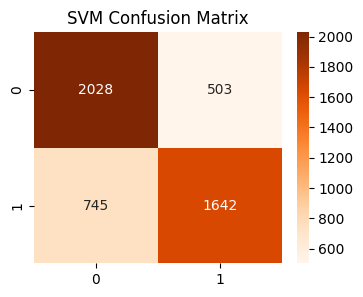

In [54]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, y_pred_svm), annot=True, cmap="Oranges", fmt='d')
plt.title("SVM Confusion Matrix")
plt.show()

#Decision Tree (DT):

Concept:
Decision Tree splits the data based on feature thresholds to create a tree of decisions. Easy to interpret but may overfit.

In [55]:
# Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(x_train, y_train)
y_pred_dt = dt.predict(x_test)

In [56]:
acc_dt = accuracy_score(y_test, y_pred_dt)
print(f"Decision Tree Accuracy: {acc_dt:.4f}")
print(classification_report(y_test, y_pred_dt))

Decision Tree Accuracy: 0.6289
              precision    recall  f1-score   support

           0       0.64      0.62      0.63      2531
           1       0.61      0.63      0.62      2387

    accuracy                           0.63      4918
   macro avg       0.63      0.63      0.63      4918
weighted avg       0.63      0.63      0.63      4918



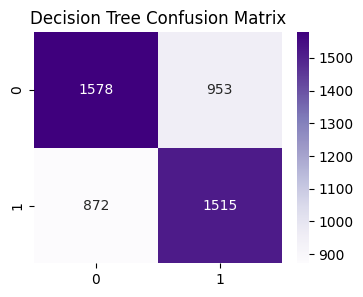

In [57]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, cmap="Purples", fmt='d')
plt.title("Decision Tree Confusion Matrix")
plt.show()

#Random Forest (RF)

Concept:
Random Forest combines multiple decision trees to improve accuracy and reduce overfitting.

In [58]:
# Random Forest
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(x_train, y_train)
y_pred_rf = rf.predict(x_test)

In [59]:
acc_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Accuracy: {acc_rf:.4f}")
print(classification_report(y_test, y_pred_rf))

Random Forest Accuracy: 0.7235
              precision    recall  f1-score   support

           0       0.72      0.75      0.74      2531
           1       0.72      0.70      0.71      2387

    accuracy                           0.72      4918
   macro avg       0.72      0.72      0.72      4918
weighted avg       0.72      0.72      0.72      4918



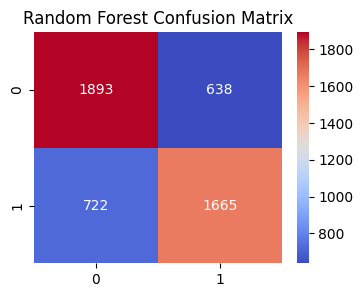

In [60]:
plt.figure(figsize=(4,3))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, cmap="coolwarm", fmt='d')
plt.title("Random Forest Confusion Matrix")
plt.show()

#Compare All Models


 Model Performance Comparison:


,Model,Accuracy
2,SVM,0.746238
0,Logistic Regression,0.734852
4,Random Forest,0.723465
1,KNN,0.685848
3,Decision Tree,0.628914


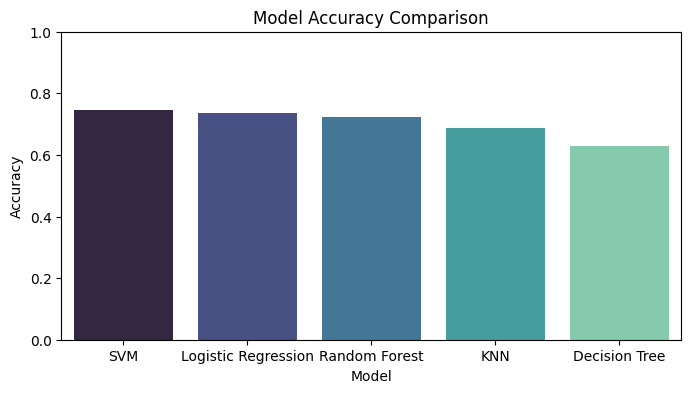

Best performing model: SVM


In [61]:
# Compare Accuracies
results = pd.DataFrame({
    "Model": ["Logistic Regression","KNN","SVM","Decision Tree","Random Forest"],
    "Accuracy": [acc_lr, acc_knn, acc_svm, acc_dt, acc_rf]
}).sort_values(by="Accuracy", ascending=False)

print("\n Model Performance Comparison:")
display(results)

plt.figure(figsize=(8,4))
sns.barplot(x="Model", y="Accuracy", data=results, palette="mako")
plt.title("Model Accuracy Comparison")
plt.ylim(0,1)
plt.show()

best_model_name = results.iloc[0,0]
print(f"Best performing model: {best_model_name}")

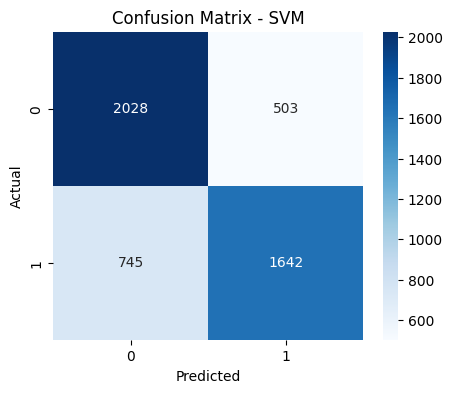


 Best Performing Model: SVM


In [63]:
# Confusion Matrix for Best Model
best_model_name = results.iloc[0,0]

# Define a dictionary to hold the trained models
models = {
    "Logistic Regression": lr,
    "KNN": knn,
    "SVM": svm,
    "Decision Tree": dt,
    "Random Forest": rf
}

best_model = models[best_model_name]

y_pred_best = best_model.predict(x_test)
cm = confusion_matrix(y_test, y_pred_best)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
plt.title(f"Confusion Matrix - {best_model_name}")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

print(f"\n Best Performing Model: {best_model_name}")

#Patient-Level Prediction (Interactive)

In [64]:
print("\n Enter patient values manually or modify the example below:")

# Example patient data (modify values)
patient_data = {
    "age_years": 52,
    "gender": 1,          # 1 = male, 2 = female (depends on dataset)
    "height": 168,
    "weight": 70,
    "ap_hi": 120,         # systolic BP
    "ap_lo": 80,          # diastolic BP
    "cholesterol": 1,     # 1 = normal, 2 = above normal, 3 = well above
    "gluc": 1,            # glucose level
    "smoke": 0,
    "alco": 0,
    "active": 1
}


 Enter patient values manually or modify the example below:


In [65]:
# Convert to dataframe
patient_df = pd.DataFrame([patient_data])

In [66]:
# Drop missing columns or align with model
for col in x.columns:
    if col not in patient_df.columns:
        patient_df[col] = 0
patient_df = patient_df[x.columns]

# Scale same as training
patient_scaled = scaler.transform(patient_df)

In [67]:
# Predict disease & probability
disease_pred = best_model.predict(patient_scaled)[0]
prob = best_model.predict_proba(patient_scaled)[0][1] if hasattr(best_model, 'predict_proba') else None

print("\n Patient Information:")
display(patient_df)

print("\nPrediction Result:")
if disease_pred == 1:
    print("High Risk of Cardiovascular Disease")
else:
    print("No Significant Risk Detected")

if prob is not None:
    print(f"Probability of Disease: {prob*100:.2f}%")


 Patient Information:


,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,bmi
0,0,0,1,168,70,120,80,1,1,0,0,1,0



Prediction Result:
High Risk of Cardiovascular Disease
Probability of Disease: 62.87%


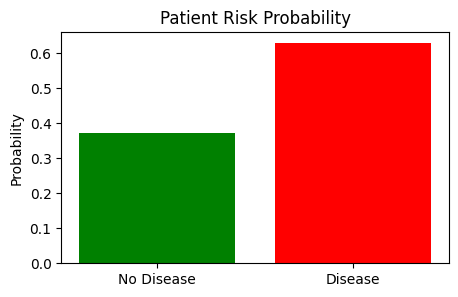

In [68]:
# Optional: Visualize risk probability
if prob is not None:
    plt.figure(figsize=(5,3))
    plt.bar(["No Disease", "Disease"], [1-prob, prob], color=["green","red"])
    plt.title("Patient Risk Probability")
    plt.ylabel("Probability")
    plt.show()

In [70]:
# Predict on your test set

y_pred= best_model.predict(x_test)

# Compare actual vs predicted
result= pd.DataFrame({
    "actual": y_test.values,
    "predicted": y_pred
  })
print(result.tail(10)) # head() is the first'st 10nd rows and tail() is the last 10nd rows

      actual  predicted
4908       0          1
4909       0          0
4910       1          1
4911       1          1
4912       1          1
4913       0          0
4914       0          0
4915       0          0
4916       0          1
4917       1          1


In [71]:
# Predict probabilities

y_prob= best_model.predict_proba(x_test)[:,1]
result["risk_probability"]= y_prob
print(result.head(20))

    actual  predicted  risk_probability
0        1          0          0.263440
1        1          1          0.828223
2        0          0          0.353919
3        1          0          0.294071
4        0          1          0.810589
5        1          0          0.261415
6        0          0          0.322604
7        1          1          0.810612
8        0          0          0.332966
9        1          1          0.598742
10       0          0          0.392596
11       0          0          0.349241
12       1          1          0.860990
13       1          0          0.262831
14       1          1          0.737759
15       1          1          0.725621
16       0          0          0.336519
17       0          0          0.228795
18       0          1          0.773834
19       0          0          0.265855


    actual  predicted  risk_probability
0        1          0          0.263440
1        1          1          0.828223
2        0          0          0.353919
3        1          0          0.294071
4        0          1          0.810589
5        1          0          0.261415
6        0          0          0.322604
7        1          1          0.810612
8        0          0          0.332966
9        1          1          0.598742
10       0          0          0.392596
11       0          0          0.349241
12       1          1          0.860990
13       1          0          0.262831
14       1          1          0.737759
15       1          1          0.725621
16       0          0          0.336519
17       0          0          0.228795
18       0          1          0.773834
19       0          0          0.265855


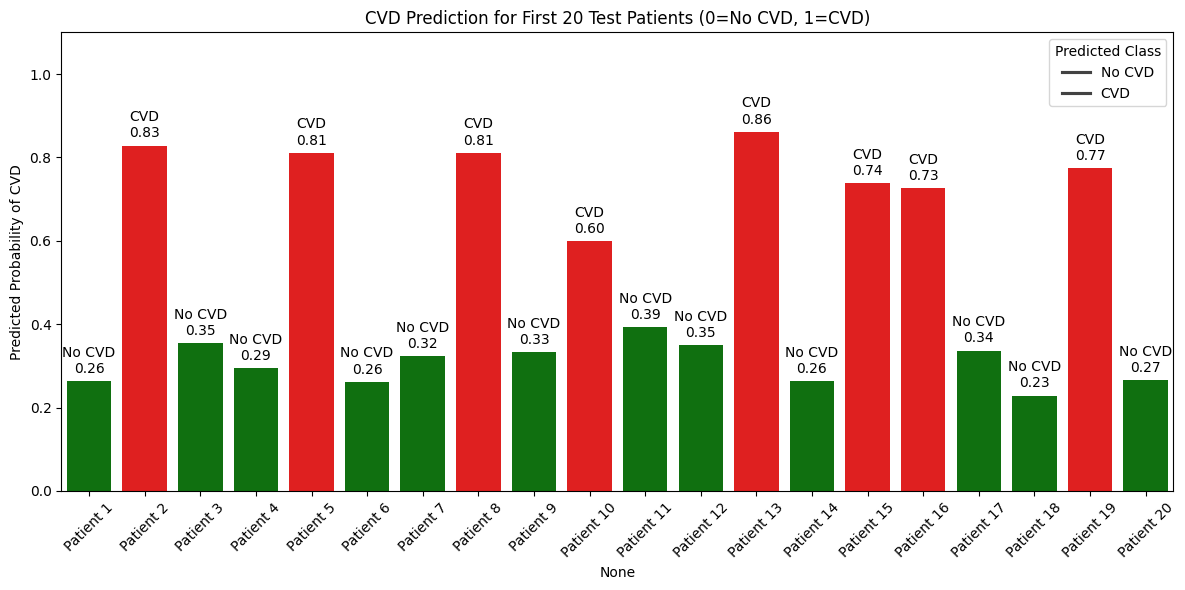

In [72]:
# Show actual vs predicted for first 20 test patients
print(result.head(20))

# Bar plot with class labels
plt.figure(figsize=(12,6))
sns.barplot(x=result.head(20).index,
            y=result.head(20)["risk_probability"],
            hue=result.head(20)["predicted"],
            palette={0:"green", 1:"red"})

# Add labels (CVD/No CVD + probability)
for i, (prob, cls) in enumerate(zip(result.head(20)["risk_probability"],
                                    result.head(20)["predicted"])):
    label = "No CVD" if cls==0 else "CVD"
    plt.text(i, prob+0.02, f"{label}\n{prob:.2f}", ha="center")

plt.xticks(result.head(20).index, [f"Patient {i+1}" for i in result.head(20).index], rotation=45)
plt.ylabel("Predicted Probability of CVD")
plt.title("CVD Prediction for First 20 Test Patients (0=No CVD, 1=CVD)")
plt.ylim(0, 1.1)
plt.legend(title="Predicted Class", labels=["No CVD", "CVD"])
plt.tight_layout()
plt.show()

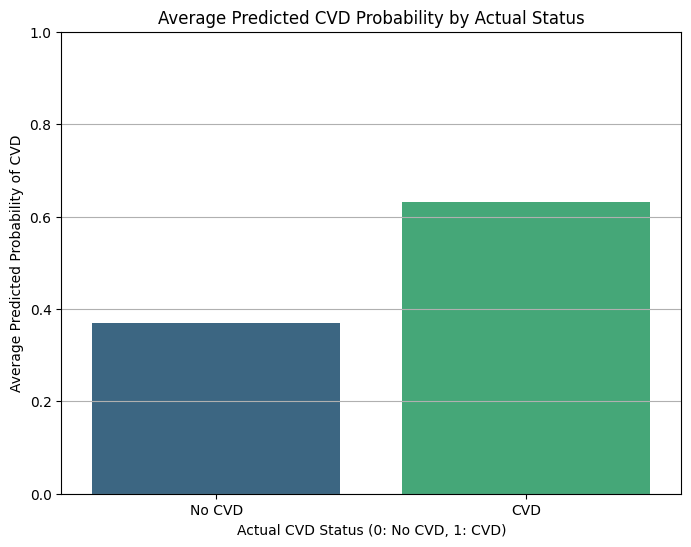

In [73]:
plt.figure(figsize=(8, 6))
sns.barplot(x='actual', y='risk_probability', data=result.groupby('actual')['risk_probability'].mean().reset_index(), palette='viridis')
plt.title('Average Predicted CVD Probability by Actual Status')
plt.xlabel('Actual CVD Status (0: No CVD, 1: CVD)')
plt.ylabel('Average Predicted Probability of CVD')
plt.xticks([0, 1], ['No CVD', 'CVD'])
plt.ylim(0, 1) # Probabilities are between 0 and 1
plt.grid(axis='y')
plt.show()

#or
#Predict for All Patients in the Dataset

In [74]:
# Predict probabilities for all patients
if hasattr(best_model, 'predict_proba'):
    df["CVD_Probability"] = best_model.predict_proba(scaler.transform(x))[:,1]
else:
    df["CVD_Probability"] = best_model.predict(scaler.transform(x))

In [75]:
# Predicted class (0 = No Disease, 1 = Disease)
df["Predicted_Status"] = best_model.predict(scaler.transform(x))

In [76]:
# Display first 10 predictions
print("Patient-level Disease Predictions:")
display(df[["age", "gender", "ap_hi", "ap_lo", "cholesterol",
            "gluc", "CVD_Probability", "Predicted_Status"]].head(10))

Patient-level Disease Predictions:


,age,gender,ap_hi,ap_lo,cholesterol,gluc,CVD_Probability,Predicted_Status
0,50,2,110,80,1.0,1.0,0.173543,0
1,55,1,140,90,3.0,1.0,0.802959,1
2,51,1,130,70,3.0,1.0,0.747168,1
3,48,2,150,100,1.0,1.0,0.882530,1
4,47,1,100,60,1.0,1.0,0.240866,0
5,60,1,120,80,2.0,2.0,0.510024,0
6,60,1,130,80,3.0,1.0,0.797687,1
7,61,2,130,90,3.0,3.0,0.787154,1
8,48,1,110,70,1.0,1.0,0.184159,0
9,54,1,110,60,1.0,1.0,0.244633,0


In [77]:
# Optionally, save to CSV
output_path = "/content/Patient_Predictions.csv"
df.to_csv(output_path, index=False)
print(f"\n✅ All patient predictions saved to: {output_path}")


✅ All patient predictions saved to: /content/Patient_Predictions.csv


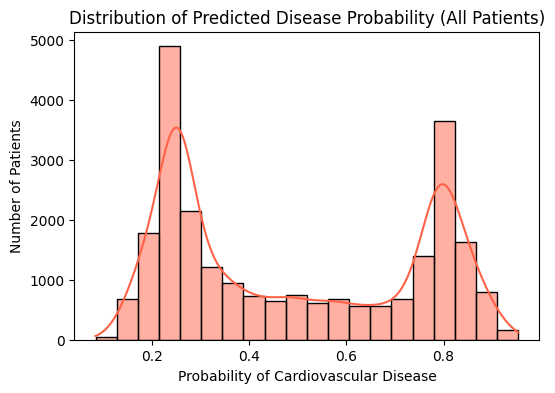

In [78]:
# Distribution of predicted risk
plt.figure(figsize=(6,4))
sns.histplot(df["CVD_Probability"], bins=20, kde=True, color="tomato")
plt.title("Distribution of Predicted Disease Probability (All Patients)")
plt.xlabel("Probability of Cardiovascular Disease")
plt.ylabel("Number of Patients")
plt.show()

In [79]:
# Visual Analysis: High-Risk vs Low-Risk Patients
# Categorize patients by predicted status
df["Risk_Level"] = df["Predicted_Status"].map({0: "Low Risk", 1: "High Risk"})

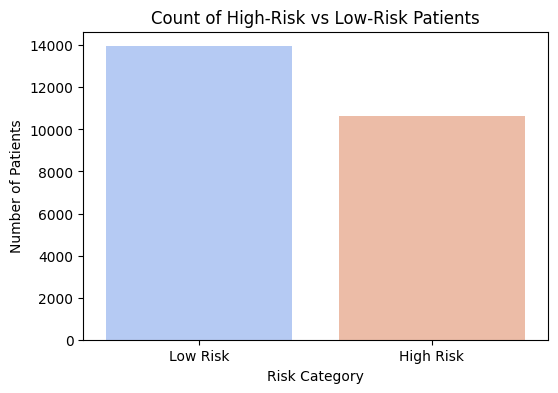

In [80]:
# Countplot: Number of High vs Low Risk Patients

plt.figure(figsize=(6,4))
sns.countplot(data=df, x="Risk_Level", palette="coolwarm")
plt.title("Count of High-Risk vs Low-Risk Patients")
plt.xlabel("Risk Category")
plt.ylabel("Number of Patients")
plt.show()

# Patient-Level Prediction (SVM)

In [81]:
# Predict for All Patients Using SVM

df["CVD_Probability_SVM"] = svm.predict_proba(scaler.transform(x))[:,1]
df["Predicted_Status_SVM"] = svm.predict(scaler.transform(x))

In [82]:
print("First 10 SVM Predictions:")
display(df[["age", "cholesterol", "ap_hi", "ap_lo", "CVD_Probability_SVM", "Predicted_Status_SVM"]].head(10))

First 10 SVM Predictions:


,age,cholesterol,ap_hi,ap_lo,CVD_Probability_SVM,Predicted_Status_SVM
0,50,1.0,110,80,0.173543,0
1,55,3.0,140,90,0.802959,1
2,51,3.0,130,70,0.747168,1
3,48,1.0,150,100,0.882530,1
4,47,1.0,100,60,0.240866,0
5,60,2.0,120,80,0.510024,0
6,60,3.0,130,80,0.797687,1
7,61,3.0,130,90,0.787154,1
8,48,1.0,110,70,0.184159,0
9,54,1.0,110,60,0.244633,0


In [83]:
# Save predictions
output_svm = "/content/SVM_Patient_Predictions.csv"
df.to_csv(output_svm, index=False)
print(f"\n All SVM predictions saved to: {output_svm}")


 All SVM predictions saved to: /content/SVM_Patient_Predictions.csv


#Predicted Disease Risk for First 50 Patients (Using SVM)

In [84]:
# Select first 50 patients
patients_50 = df.head(50).copy()

In [85]:
# Ensure correct columns are used
x_cols = x.columns  # features used in model training

In [86]:
# Scale the data (use same scaler as training)
patients_scaled = scaler.transform(patients_50[x_cols])

In [87]:
# Predict using your trained model (choose: svm_model or best_model)
patients_50["Predicted_Class"] = svm.predict(patients_scaled)
patients_50["CVD_Probability"] = svm.predict_proba(patients_scaled)[:, 1]

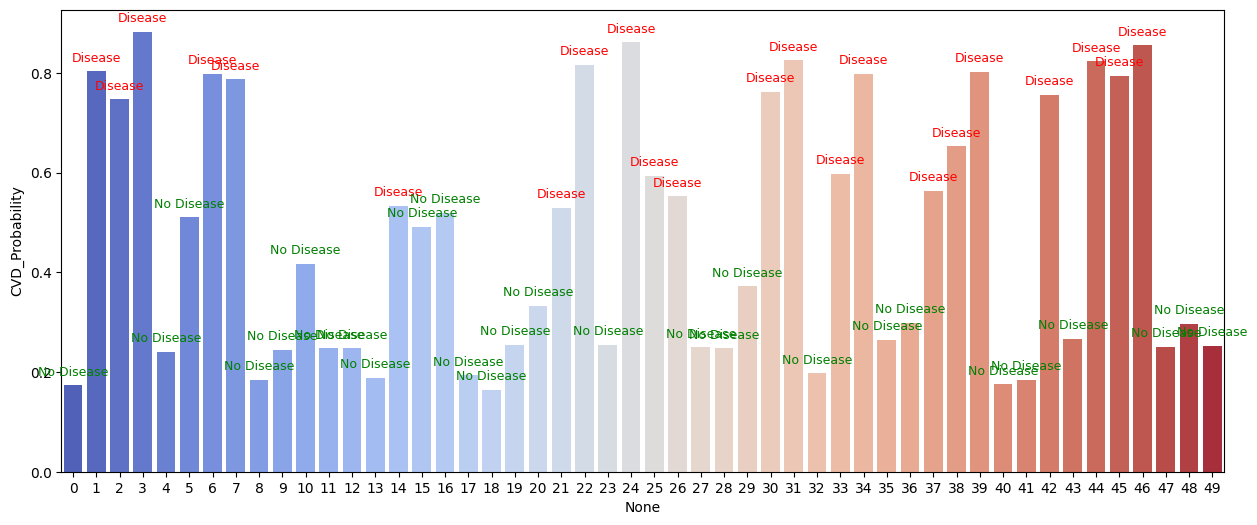

In [88]:
# Plot probability for first 50 patients
plt.figure(figsize=(15,6))
sns.barplot(x=patients_50.index, y=patients_50['CVD_Probability'], palette="coolwarm")

# Add labels (Disease / No Disease)
for i, prob in enumerate(patients_50['CVD_Probability']):
    label = "Disease" if patients_50['Predicted_Class'].iloc[i] == 1 else "No Disease"
    plt.text(i, prob + 0.02, label,
             ha='center',
             color=('red' if label=="Disease" else 'green'),
             fontsize=9)

In [89]:
# Generate x-axis positions
x_positions = range(len(patients_50))

In [90]:
# Assign colors based on risk
colors = ['red' if risk == 1 else 'green' for risk in patients_50["Predicted_Class"]]

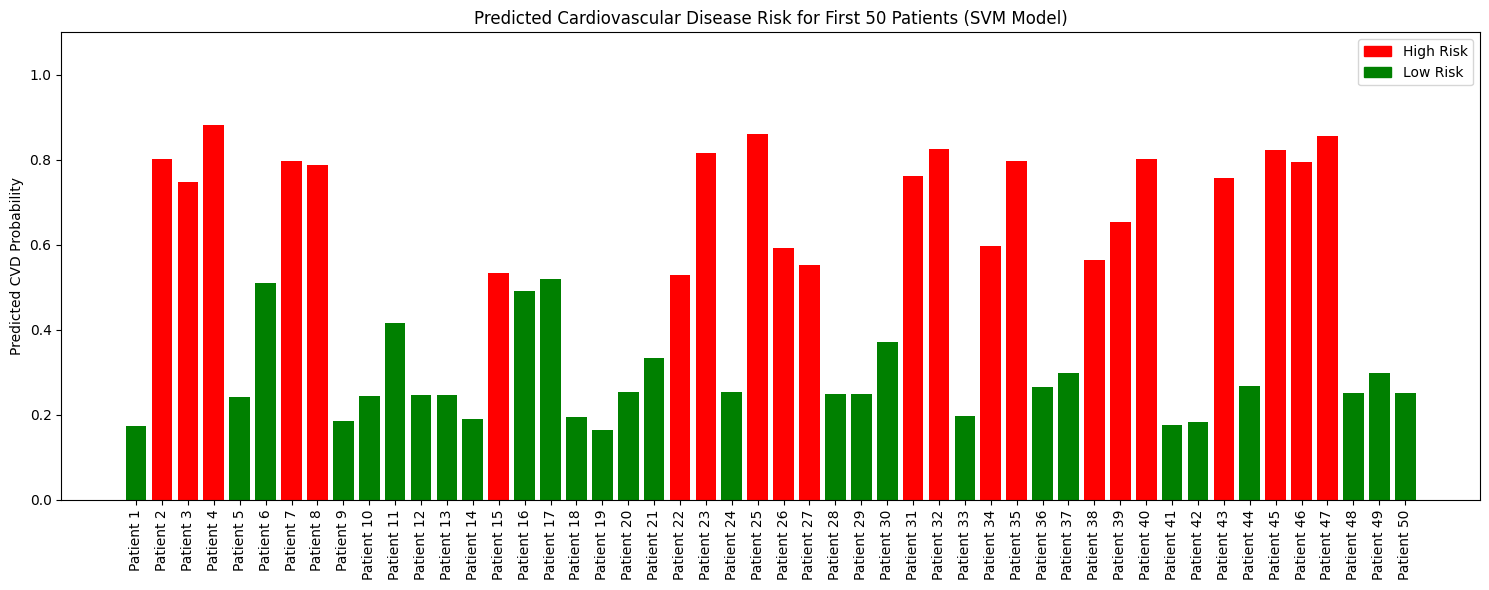

In [93]:
import matplotlib.patches as mpatches

# Plot
plt.figure(figsize=(15, 6))
plt.bar(x_positions, patients_50["CVD_Probability"], color=colors)
plt.xticks(x_positions, [f"Patient {i+1}" for i in x_positions], rotation=90)
plt.ylabel("Predicted CVD Probability")
plt.title("Predicted Cardiovascular Disease Risk for First 50 Patients (SVM Model)")
plt.ylim(0, 1.1)

# Add legend
red_patch = mpatches.Patch(color='red', label='High Risk')
green_patch = mpatches.Patch(color='green', label='Low Risk')
plt.legend(handles=[red_patch, green_patch])

plt.tight_layout()
plt.show()

In [94]:
# Save to Excel
output_file = "CVD_Predictions.xlsx"
result.to_excel(output_file, index=False)

print(f"Predictions saved to {output_file}")

Predictions saved to CVD_Predictions.xlsx


In [95]:
# Save Predictions
# Save patient predictions
patients_50.to_excel("CVD_First50_Predictions.xlsx", index=False)

# Save test set predictions
result.to_excel("CVD_TestSet_Predictions.xlsx", index=False)

In [97]:
# Save all patient predictions to an Excel file
df.to_excel("CVD_All_Patient_Predictions.xlsx", index=False)

# Save model performance comparison to an Excel file
results.to_excel("CVD_Model_Performance.xlsx", index=False)

# Save feature importance to an Excel file
# Check if 'feat_importance' DataFrame exists before saving
# if 'feat_importance' in locals() and isinstance(feat_importance, pd.DataFrame):
#     feat_importance.to_excel("CVD_Feature_Importance.xlsx", index=False)
# else:
#     print("Feature importance DataFrame not found. Skipping save.")

print("All specified DataFrames saved to separate Excel files.")

All specified DataFrames saved to separate Excel files.


In [98]:
import os
print(os.getcwd())   # shows working folder

/content


In [99]:
os.listdir()

['.config',
 'CVD_Model_Performance.xlsx',
 'CVD_Predictions.xlsx',
 'SVM_Patient_Predictions.csv',
 'CVD_TestSet_Predictions.xlsx',
 'cardio.csv',
 'CVD_First50_Predictions.xlsx',
 'Patient_Predictions.csv',
 'CVD_All_Patient_Predictions.xlsx',
 'sample_data']

In [101]:
from google.colab import files
import os

# Combine all Excel files in the folder into one file with separate sheets
output_filename = "Combined_CVD_Data.xlsx"
with pd.ExcelWriter(output_filename, engine="openpyxl") as writer:
    for f in [x for x in os.listdir() if x.endswith(".xlsx") and x != output_filename]:
        try:
            pd.read_excel(f, engine="openpyxl").to_excel(writer, sheet_name=f.split(".")[0], index=False)
        except Exception as e:
            print(f"Could not read or write file {f}: {e}")

files.download(output_filename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>